# Traffic Sign Recognition

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYRi6lFq1cnXbxTuxZOfee1IeA7V4oZyOhlLChG-SDQeec3dPK54VtiF1YzHYP4vjYYnE&usqp=CAU" width=100%>

In [1]:
## Importing required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from PIL import Image
import warnings

warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

# Loading the data
- The data consist of over 50000 images of traffic signs beloging to 43 different classes.
- The `Meta` folder contains a image from each class
- The `Train` folder has over 39000 images for training and `Test' folder contains about 12000 images.
- The csv files contain image dimension, its path and corresponding label.

In [2]:
cwd = '../input/gtsrb-german-traffic-sign/'
os.listdir(cwd)

['Meta',
 'meta',
 'Meta.csv',
 'Train.csv',
 'Test.csv',
 'Test',
 'test',
 'Train',
 'train']

In [3]:
meta = os.listdir(cwd+'Meta')
meta.remove('.~lock.ClassesInformation.ods#')
meta.remove('.~lock.ClassesInformationStrong.ods#')
meta

['37.png',
 '35.png',
 '11.png',
 '31.png',
 '4.png',
 '40.png',
 '33.png',
 '9.png',
 '14.png',
 '1.png',
 '39.png',
 '20.png',
 '38.png',
 '2.png',
 '10.png',
 '36.png',
 '18.png',
 '21.png',
 '12.png',
 '28.png',
 '22.png',
 '34.png',
 '41.png',
 '7.png',
 '29.png',
 '17.png',
 '5.png',
 '3.png',
 '16.png',
 '8.png',
 '24.png',
 '32.png',
 '6.png',
 '23.png',
 '15.png',
 '30.png',
 '27.png',
 '13.png',
 '25.png',
 '0.png',
 '19.png',
 '26.png',
 '42.png']

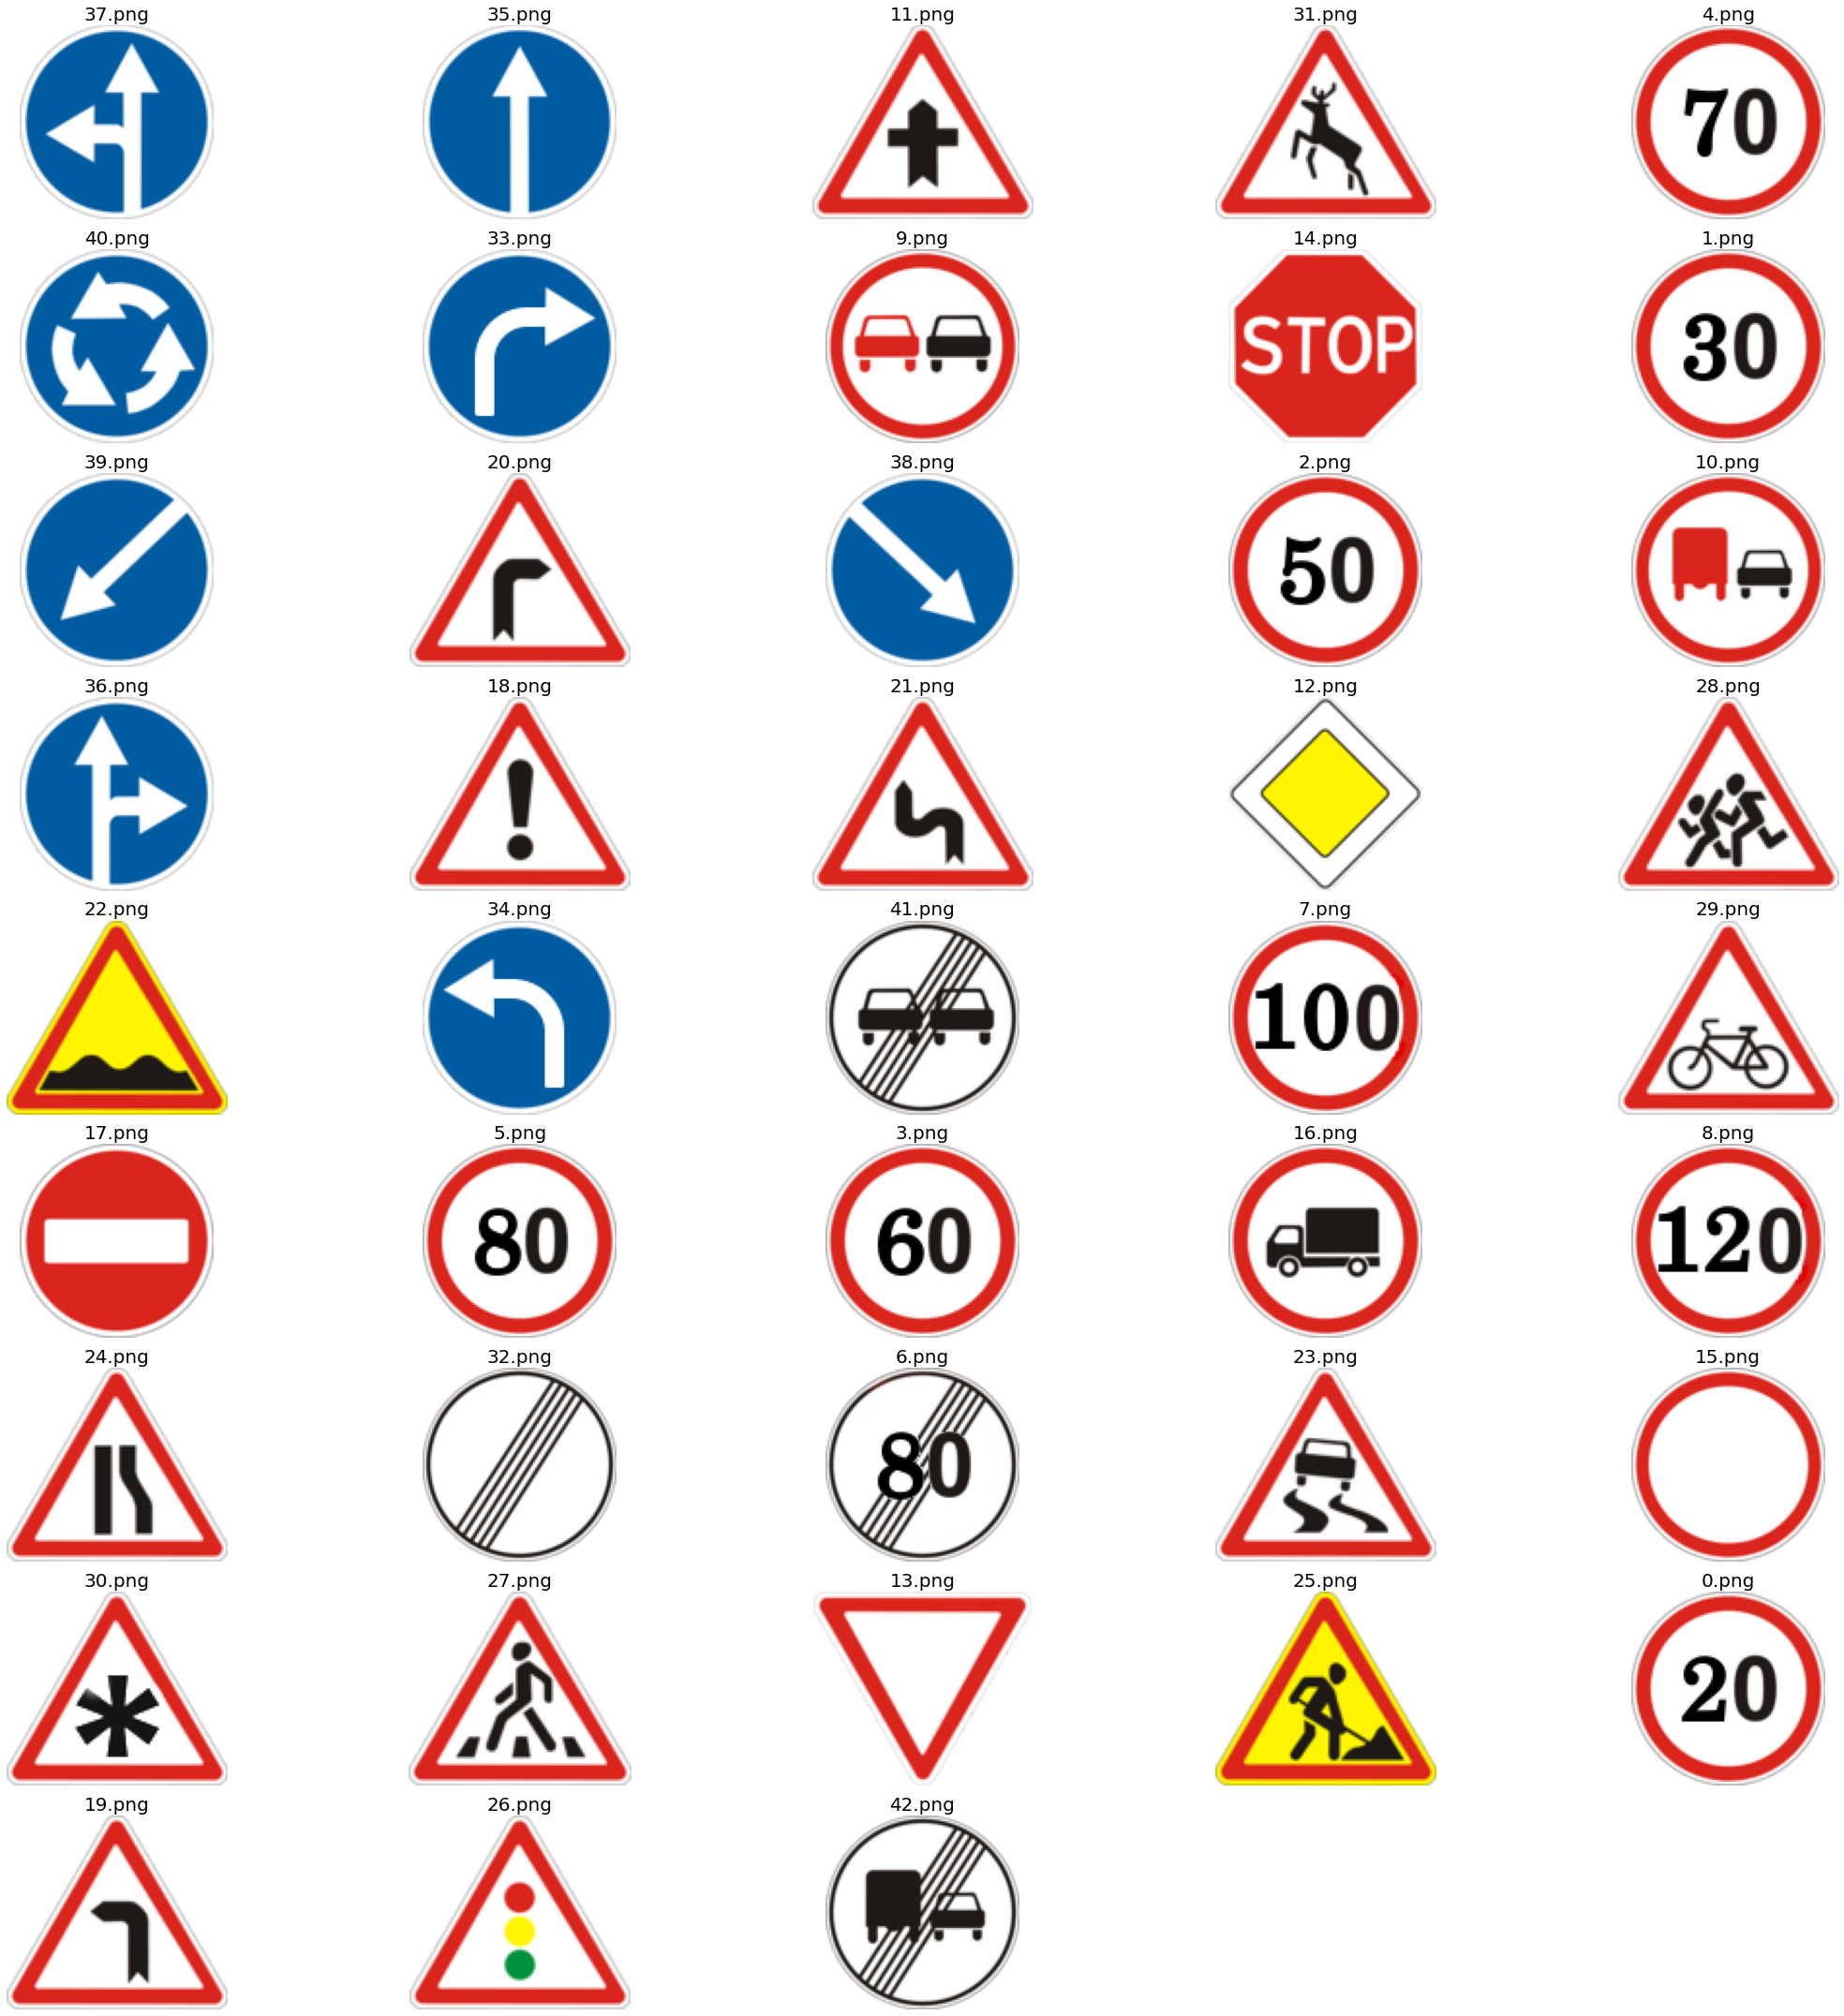

In [4]:
## Viewing images belonging to each class

plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(cwd+'Meta/'+file)
    ax = plt.subplot(9,5,i+1)
    ax.imshow(img)
    ax.set_title(file, size=20)
    plt.axis('off')
plt.tight_layout()

In [5]:
## Creating a dictionary for class labels

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [6]:
train_df = pd.read_csv(cwd+'Train.csv')
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [7]:
train_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


# Preprocessing
- The average dimensions of all images is about 50x50 pixels.
- All images are resized to (50,50) pixels and saved as numpy array
- The data is normalized and the labels are One Hot encoded

In [8]:
print(f'minimum width: {train_df.Width.min()}')
print(f'minimum height: {train_df.Height.min()}')
print(f'average width: {train_df.Width.mean()}')
print(f'average height: {train_df.Height.mean()}')

minimum width: 25
minimum height: 25
average width: 50.83587951745773
average height: 50.328929582493814


In [9]:
train_x =[]
for i in train_df.Path:
    img = Image.open(cwd+i)       # reading image
    img = img.resize((50,50))     # reasizing image
    train_x.append(np.array(img)) # saving image as array to train

train_y = np.array(train_df.ClassId)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 50, 50, 3)
(39209,)


In [10]:
test_df = pd.read_csv(cwd+'Test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [11]:
test_x =[]
for i in test_df.Path:
    img = Image.open(cwd+i)
    img = img.resize((50,50))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


Dangerous curve right


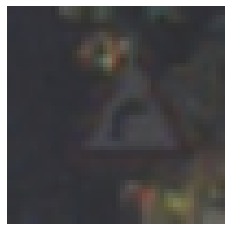

In [12]:
print(classes[train_y[2]])
plt.imshow(train_x[2])
plt.axis('off')
plt.show()

In [13]:
## Normalization

xtrain = train_x/255
xtest = test_x/255


# One Hot encoding

ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)

# Creating CNN model
- Data is split into training and validation data
- The CNN model contains two blocks, each containing two convolutional layers connected to one Max pooling layer
- This is then connected to a fully connected NN with dropout layers in between.
- The model is compiled with a SGD optimizer and loss function as categorical crossentropy

In [14]:
## Splitting into train and validation data

from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)
print(xtrain.shape)
print(xvalid.shape)
print(ytrain.shape)
print(yvalid.shape)

(31367, 50, 50, 3)
(7842, 50, 50, 3)
(31367, 43)
(7842, 43)


In [15]:
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size= (5,5), strides=2, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()

2022-01-21 17:12:05.421684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 17:12:05.511130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 17:12:05.512211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0

2022-01-21 17:12:05.514696: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-21 17:12:05.515662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 17:12:05.516605: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 17:12:05.517524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

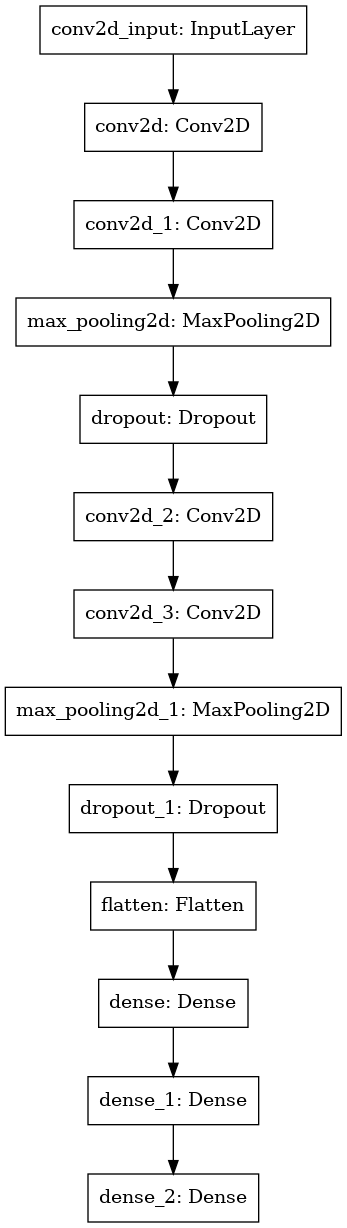

In [16]:
keras.utils.plot_model(model)

In [17]:
# Compiling the CNN model
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [18]:
## Fitting the model, with early stopping callback

earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights =True)

model_history = model.fit(xtrain,ytrain, epochs=200,
                         validation_data=(xvalid,yvalid),
                         callbacks=[earlystop_cb])

2022-01-21 17:12:09.198232: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 941010000 exceeds 10% of free system memory.
2022-01-21 17:12:10.165768: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 941010000 exceeds 10% of free system memory.
2022-01-21 17:12:10.862730: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-01-21 17:12:12.140634: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


981/981 [==============================] - 12s 6ms/step - loss: 3.5653 - accuracy: 0.0635 - val_loss: 3.4719 - val_accuracy: 0.0779
Epoch 2/200
981/981 [==============================] - 5s 5ms/step - loss: 3.3801 - accuracy: 0.1123 - val_loss: 3.0966 - val_accuracy: 0.2068
Epoch 3/200
981/981 [==============================] - 5s 5ms/step - loss: 2.4663 - accuracy: 0.3083 - val_loss: 1.8538 - val_accuracy: 0.4077
Epoch 4/200
981/981 [==============================] - 5s 5ms/step - loss: 1.4678 - accuracy: 0.5433 - val_loss: 1.1570 - val_accuracy: 0.6600
Epoch 5/200
981/981 [==============================] - 5s 5ms/step - loss: 1.0224 - accuracy: 0.6744 - val_loss: 0.9793 - val_accuracy: 0.6877
Epoch 6/200
981/981 [==============================] - 5s 5ms/step - loss: 0.7988 - accuracy: 0.7435 - val_loss: 0.4570 - val_accuracy: 0.8632
Epoch 7/200
981/981 [==============================] - 5s 5ms/step - loss: 0.6397 - accuracy: 0.7933 - val_loss: 0.4048 - val_accuracy: 0.8667
Epoch 8/20

In [19]:
# model.save('model1.h5')

<AxesSubplot:>

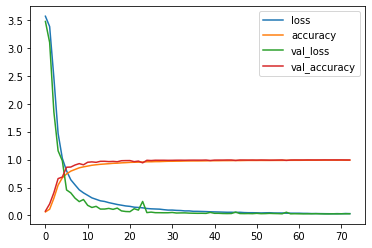

In [20]:
pd.DataFrame(model_history.history).plot()

# Evaluating model performance and making predictions

In [21]:
## Evaluating the model

loss, accuracy = model.evaluate(xtest,ytest)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 1s 4ms/step - loss: 0.3153 - accuracy: 0.9367
Loss = 0.32
accuracy = 93.67%


In [22]:
## Making predictions

prob = model.predict(xtest)
pred = np.argmax(prob, axis=-1)


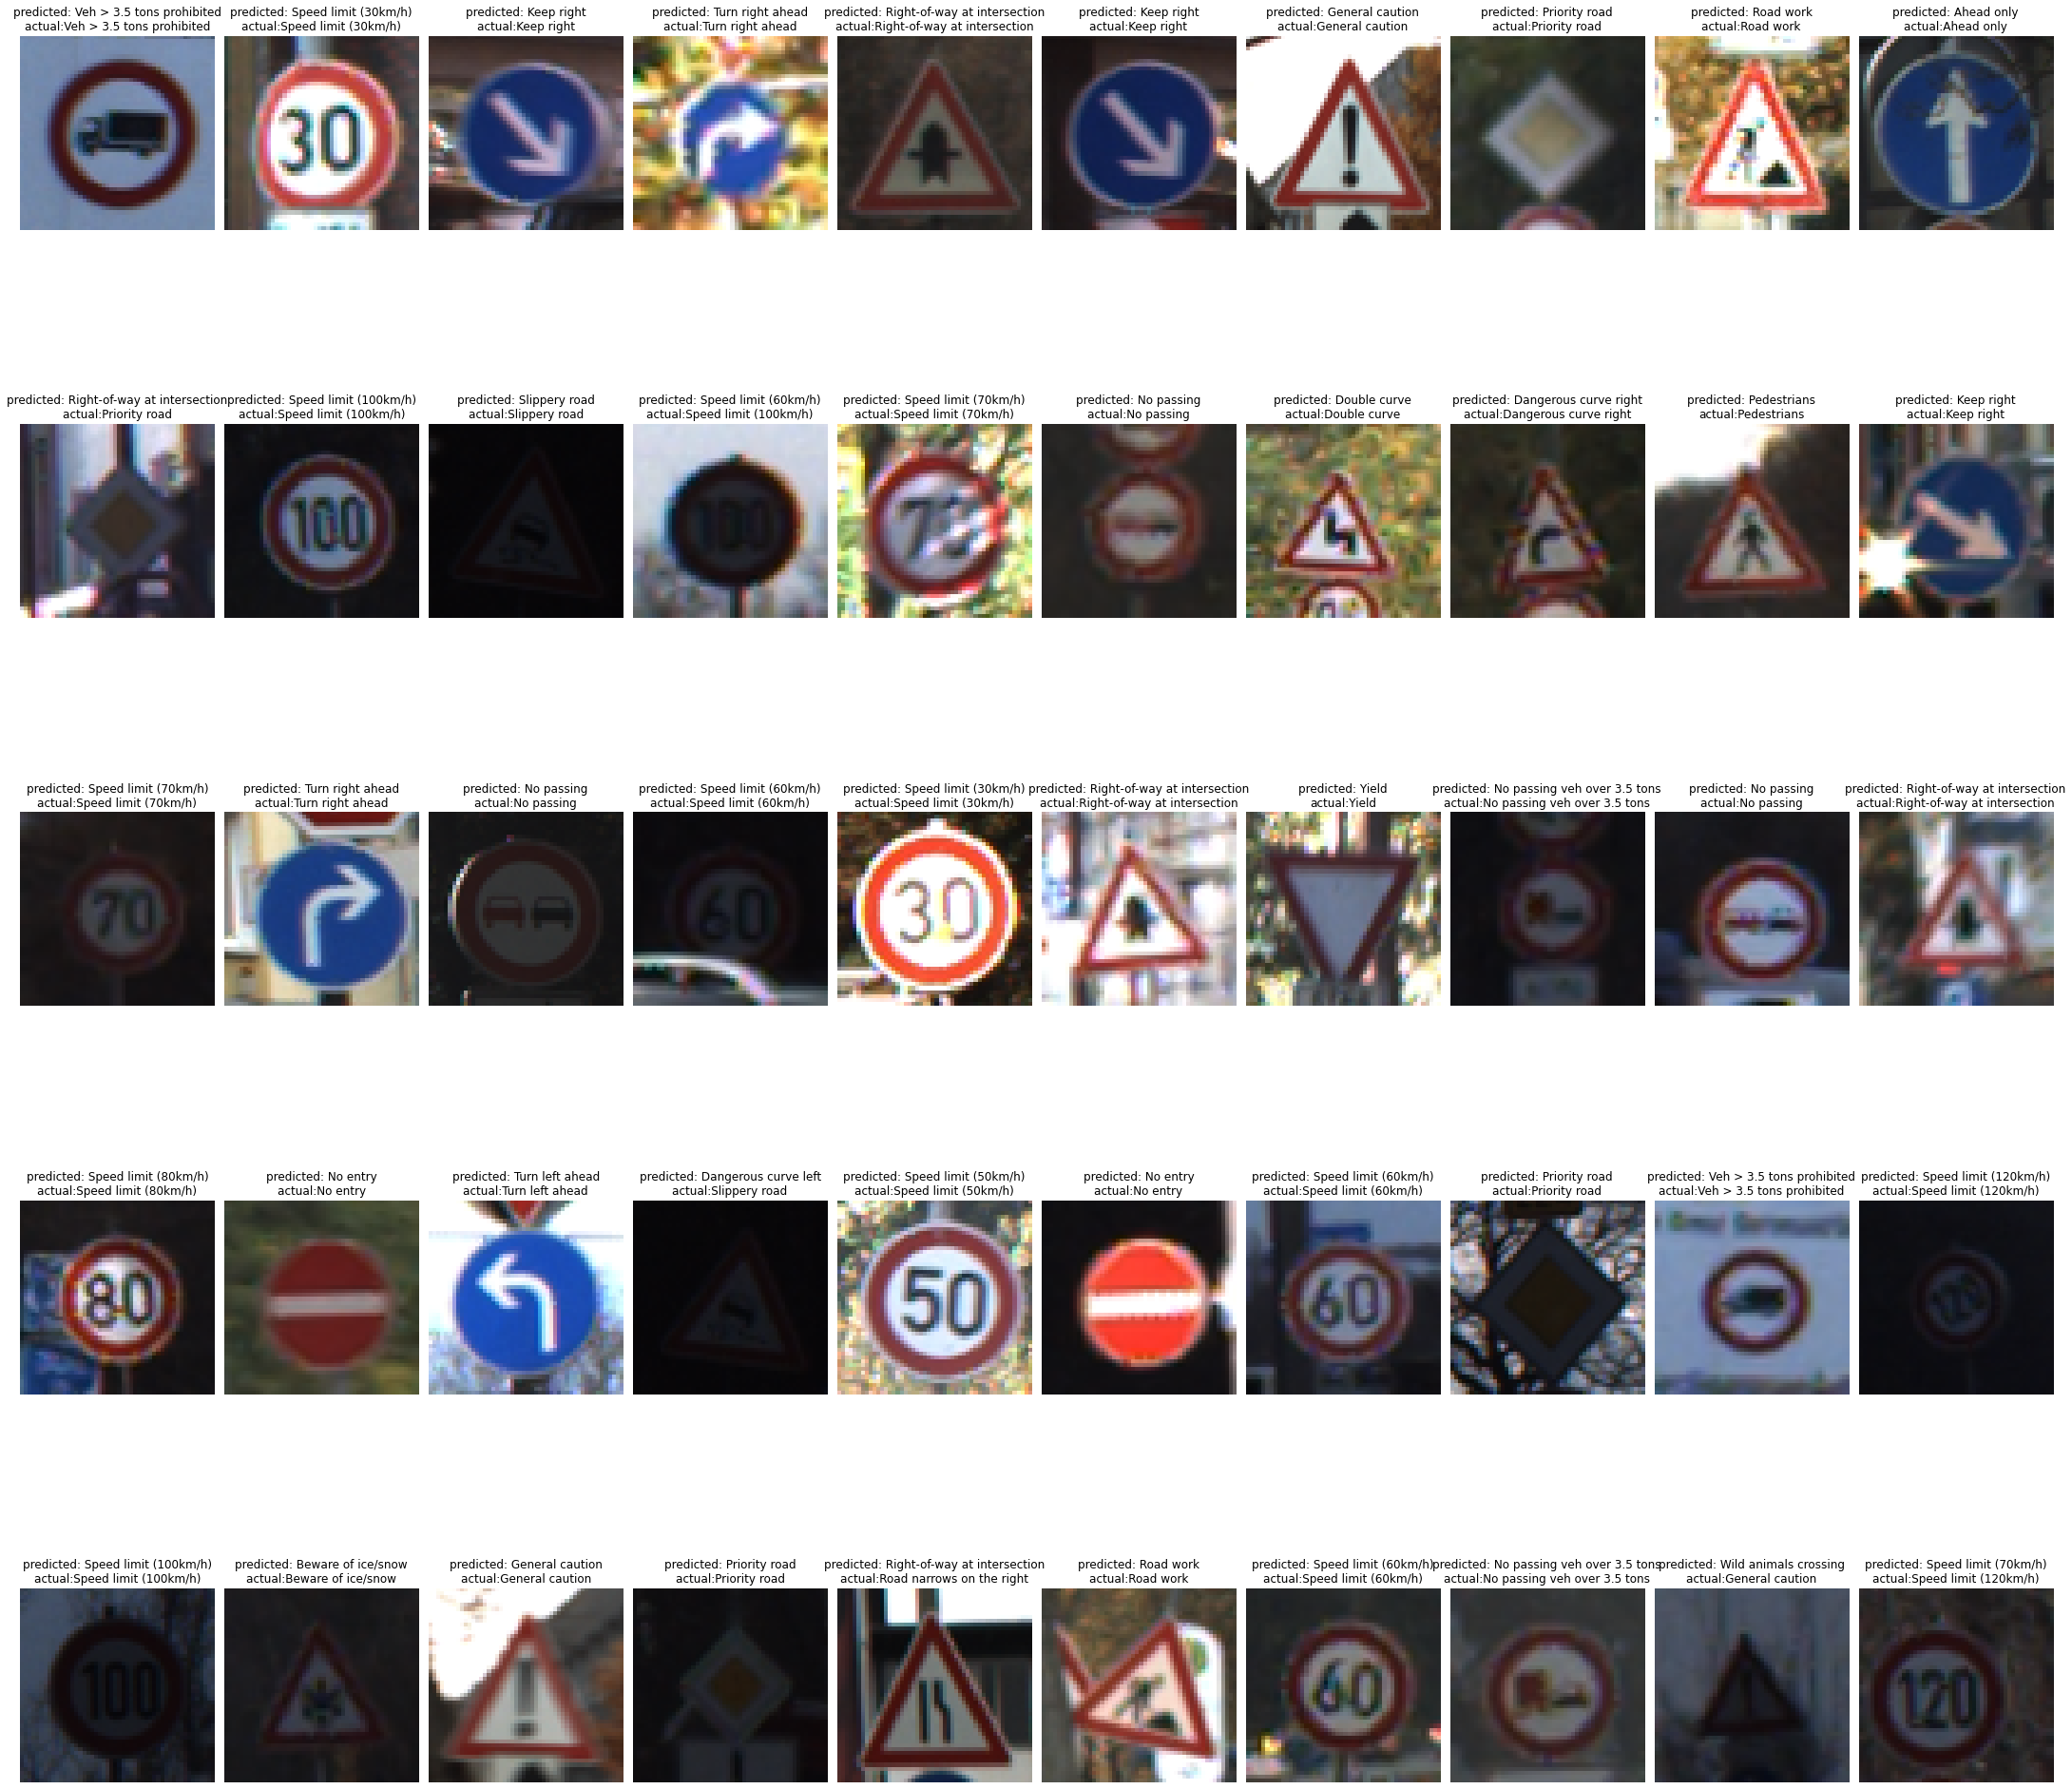

In [23]:
# print(prob[1])
plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(xtest[i])
    ax.set_title(f'predicted: {classes[pred[i]]}\nactual:{classes[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()